<a href="https://colab.research.google.com/github/juberrahman/MachineLearning-and-BigData/blob/master/XGBoost_Cyclone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
df=pd.read_csv('Master_1068.csv',index_col=0)
df.head()

,NAME,ISO,YEAR_MIN,Unnamed: 4,BASIN,SUBBASIN,NATURE,TRACK_TYPE,ISO_TIME,COORDS,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,WIND_CALC_MEAN (v_land_kn to be used),PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,34KN_POP,34KN_ASSETS,64KN_POP,64KN_ASSETS,96KN_POP,96KN_ASSETS,CPI,TOTAL_DAMAGE_(000$),Total Affected]
SID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1949163N07145,DELLA,JPN,1949,DELLAJPN1949,WP,WP,TS,main,"['1949-06-21 03:00:00', '1949-06-22 03:00:00',...","[[35.67, 130.99], [38.35, 135.07], [38.82, 136...",0,0,0,0,39.133333,1000.333333,19.0,91.444444,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,194046
1950241N23140,JANE,JPN,1950,JANEJPN1950,WP,WP,ET,main,"['1950-09-02 18:00:00', '1950-09-03 12:00:00',...","[[31.71, 134.12], [38.48, 137.98], [46.7, 152.8]]",6,0,6,-1,76.400000,974.833333,23.0,37.666667,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,642117
1951224N12316,CHARLIE,JAM,1951,CHARLIEJAM1951,NAm,NAm,TS,main,"['1951-08-17 21:00:00', '1951-08-18 12:00:00']","[[17.34, -75.41], [18.3, -79.4]]",15,0,15,1,88.500000,974.500000,15.5,283.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,10.175534,56000.0,20200
1951337N09150,AMY,PHL,1951,AMYPHL1951,WP,WP,TS,main,"['1951-12-08 18:00:00', '1951-12-08 21:00:00',...","[[11.52, 127.35], [11.34, 127.09], [11.17, 126...",15,0,15,2,84.488235,979.549020,3.0,161.647059,119.200,20464826.0,1.880275e+11,12675908.0,1.131051e+11,5618193.0,4.897333e+10,10.175534,NaN,60000
1952180N05144,EMMA,PHL,1952,EMMAPHL1952,WP,WP,TS,main,"['1952-07-01 18:00:00', '1952-07-01 21:00:00',...","[[9.57, 127.79], [9.63, 127.19], [12.38, 119.4...",3,2,1,1,83.920000,980.600000,10.8,291.400000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,103


In [0]:
df.columns

Index(['NAME', 'ISO', 'YEAR_MIN', 'Unnamed: 4', 'BASIN', 'SUBBASIN', 'NATURE',
       'TRACK_TYPE', 'ISO_TIME', 'COORDS', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS',
       'USA_SSHS', 'WIND_CALC_MEAN (v_land_kn to be used)', 'PRES_CALC_MEAN',
       'STORM_SPD_MEAN', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_POP',
       '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS',
       'CPI', 'TOTAL_DAMAGE_(000$)', 'Total Affected]'],
      dtype='object')

In [0]:
df_sel=df[['SUBBASIN', 'NATURE','TRACK_TYPE', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS',
       'USA_SSHS', 'PRES_CALC_MEAN','STORM_SPD_MEAN', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_POP',
       '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS',
       'CPI','Total Affected]']]

In [0]:
df_sel.columns=['SUBBASIN', 'NATURE','TRACK_TYPE', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS',
       'USA_SSHS', 'PRES_CALC_MEAN','STORM_SPD_MEAN', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_POP',
       '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS','CPI','Total Affected']

In [0]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 1949163N07145 to 1988285N09318
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBBASIN        1068 non-null   object 
 1   NATURE          1068 non-null   object 
 2   TRACK_TYPE      1068 non-null   object 
 3   TOTAL_HRS       1068 non-null   int64  
 4   DAY_HRS         1068 non-null   int64  
 5   NIGHT_HRS       1068 non-null   int64  
 6   USA_SSHS        1068 non-null   int64  
 7   PRES_CALC_MEAN  1068 non-null   float64
 8   STORM_SPD_MEAN  1068 non-null   float64
 9   STORM_DR_MEAN   1068 non-null   float64
 10  V_LAND_KN       1068 non-null   float64
 11  34KN_POP        819 non-null    float64
 12  34KN_ASSETS     819 non-null    float64
 13  64KN_POP        819 non-null    float64
 14  64KN_ASSETS     819 non-null    float64
 15  96KN_POP        819 non-null    float64
 16  96KN_ASSETS     819 non-null    float64
 17  CPI             1

In [0]:
df_sel.isna().sum()

SUBBASIN            0
NATURE              0
TRACK_TYPE          0
TOTAL_HRS           0
DAY_HRS             0
NIGHT_HRS           0
USA_SSHS            0
PRES_CALC_MEAN      0
STORM_SPD_MEAN      0
STORM_DR_MEAN       0
V_LAND_KN           0
34KN_POP          249
34KN_ASSETS       249
64KN_POP          249
64KN_ASSETS       249
96KN_POP          249
96KN_ASSETS       249
CPI                 0
Total Affected      0
dtype: int64

In [0]:
# fill misssing values with KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(df_sel.drop(['SUBBASIN','NATURE','TRACK_TYPE'],axis=1))
pd.DataFrame(df_filled).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [0]:
col_names=['TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS',
       'USA_SSHS', 'PRES_CALC_MEAN','STORM_SPD_MEAN', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_POP',
       '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS','CPI','Total Affected']
df_imputed=pd.DataFrame(df_filled)
df_imputed.columns=col_names


df_imputed.head()

,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,34KN_POP,34KN_ASSETS,64KN_POP,64KN_ASSETS,96KN_POP,96KN_ASSETS,CPI,Total Affected
0,0.0,0.0,0.0,0.0,1000.333333,19.0,91.444444,99.820,3.335709e+07,3.652050e+12,9.825829e+06,1.308496e+12,8.117263e+05,1.196911e+11,9.327572,194046.0
1,6.0,0.0,6.0,-1.0,974.833333,23.0,37.666667,99.820,1.517600e+07,1.296460e+12,5.578279e+06,6.064228e+11,1.815180e+05,1.687883e+09,9.431937,642117.0
2,15.0,0.0,15.0,1.0,974.500000,15.5,283.500000,132.400,2.788659e+06,2.148198e+10,2.788659e+06,2.148198e+10,2.552903e+06,1.948346e+10,10.175534,20200.0
3,15.0,0.0,15.0,2.0,979.549020,3.0,161.647059,119.200,2.046483e+07,1.880275e+11,1.267591e+07,1.131051e+11,5.618193e+06,4.897333e+10,10.175534,60000.0
4,3.0,2.0,1.0,1.0,980.600000,10.8,291.400000,110.691,2.675016e+07,6.284626e+11,7.852587e+06,8.304139e+10,3.523097e+06,3.931635e+10,10.410354,103.0


In [0]:
df_imputed.index = df_sel.index
# Assign the columns.
df_imputed['SUBBASIN'] = df_sel['SUBBASIN'].values
df_imputed['NATURE']=df_sel['NATURE'].values
df_imputed['TRACK_TYPE']=df_sel['TRACK_TYPE'].values
df_imputed.head()


,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,34KN_POP,34KN_ASSETS,64KN_POP,64KN_ASSETS,96KN_POP,96KN_ASSETS,CPI,Total Affected,SUBBASIN,NATURE,TRACK_TYPE
SID,,,,,,,,,,,,,,,,,,,
1949163N07145,0.0,0.0,0.0,0.0,1000.333333,19.0,91.444444,99.820,3.335709e+07,3.652050e+12,9.825829e+06,1.308496e+12,8.117263e+05,1.196911e+11,9.327572,194046.0,WP,TS,main
1950241N23140,6.0,0.0,6.0,-1.0,974.833333,23.0,37.666667,99.820,1.517600e+07,1.296460e+12,5.578279e+06,6.064228e+11,1.815180e+05,1.687883e+09,9.431937,642117.0,WP,ET,main
1951224N12316,15.0,0.0,15.0,1.0,974.500000,15.5,283.500000,132.400,2.788659e+06,2.148198e+10,2.788659e+06,2.148198e+10,2.552903e+06,1.948346e+10,10.175534,20200.0,NAm,TS,main
1951337N09150,15.0,0.0,15.0,2.0,979.549020,3.0,161.647059,119.200,2.046483e+07,1.880275e+11,1.267591e+07,1.131051e+11,5.618193e+06,4.897333e+10,10.175534,60000.0,WP,TS,main
1952180N05144,3.0,2.0,1.0,1.0,980.600000,10.8,291.400000,110.691,2.675016e+07,6.284626e+11,7.852587e+06,8.304139e+10,3.523097e+06,3.931635e+10,10.410354,103.0,WP,TS,main


In [0]:
col_order=['TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS', 'USA_SSHS', 'PRES_CALC_MEAN',
       'STORM_SPD_MEAN', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_POP',
       '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS',
       'CPI', 'SUBBASIN', 'NATURE', 'TRACK_TYPE','Total Affected']
df_imputed=df_imputed.reindex(columns=col_order)
df_imputed.head()

,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,34KN_POP,34KN_ASSETS,64KN_POP,64KN_ASSETS,96KN_POP,96KN_ASSETS,CPI,SUBBASIN,NATURE,TRACK_TYPE,Total Affected
SID,,,,,,,,,,,,,,,,,,,
1949163N07145,0.0,0.0,0.0,0.0,1000.333333,19.0,91.444444,99.820,3.335709e+07,3.652050e+12,9.825829e+06,1.308496e+12,8.117263e+05,1.196911e+11,9.327572,WP,TS,main,194046.0
1950241N23140,6.0,0.0,6.0,-1.0,974.833333,23.0,37.666667,99.820,1.517600e+07,1.296460e+12,5.578279e+06,6.064228e+11,1.815180e+05,1.687883e+09,9.431937,WP,ET,main,642117.0
1951224N12316,15.0,0.0,15.0,1.0,974.500000,15.5,283.500000,132.400,2.788659e+06,2.148198e+10,2.788659e+06,2.148198e+10,2.552903e+06,1.948346e+10,10.175534,NAm,TS,main,20200.0
1951337N09150,15.0,0.0,15.0,2.0,979.549020,3.0,161.647059,119.200,2.046483e+07,1.880275e+11,1.267591e+07,1.131051e+11,5.618193e+06,4.897333e+10,10.175534,WP,TS,main,60000.0
1952180N05144,3.0,2.0,1.0,1.0,980.600000,10.8,291.400000,110.691,2.675016e+07,6.284626e+11,7.852587e+06,8.304139e+10,3.523097e+06,3.931635e+10,10.410354,WP,TS,main,103.0


(array([1.01e+03, 3.30e+01, 9.00e+00, 8.00e+00, 1.00e+00, 4.00e+00,
        2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([2.00000000e+00, 2.96220180e+06, 5.92440160e+06, 8.88660140e+06,
        1.18488012e+07, 1.48110010e+07, 1.77732008e+07, 2.07354006e+07,
        2.36976004e+07, 2.66598002e+07, 2.96220000e+07]),
 <a list of 10 Patch objects>)

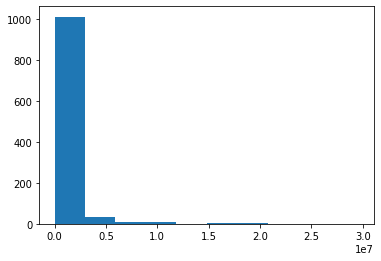

In [0]:
plt.hist(df_imputed['Total Affected'])

In [0]:
df_imputed['Total Affected'].describe()

count    1.068000e+03
mean     6.176084e+05
std      2.050822e+06
min      2.000000e+00
25%      3.130500e+03
50%      3.037550e+04
75%      2.710000e+05
max      2.962200e+07
Name: Total Affected, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fb1a8239e80>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb1a824a8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1a8253390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1a824afd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb1a824a1d0>,
  <matplotlib.lines.Line2D at 0x7fb1a824a550>]}

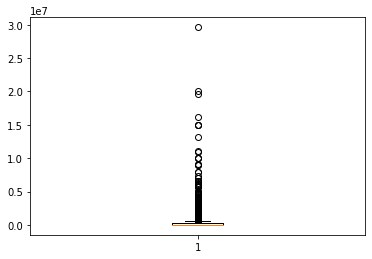

In [0]:
plt.boxplot(df_imputed['Total Affected'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb1a81e3ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb1a7b0f4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1a7b0ff28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1a7b0fba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb1a81e39b0>,
  <matplotlib.lines.Line2D at 0x7fb1a81e3f98>]}

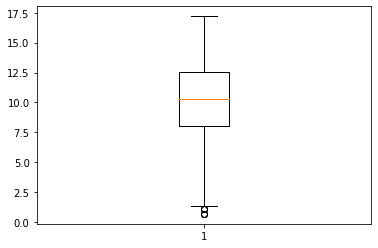

In [60]:
pop=df_imputed['Total Affected'].values
plt.boxplot(np.log(pop))

{'boxes': [<matplotlib.lines.Line2D at 0x7fb1a7a5f860>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb1a7a6c2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1a7a6cd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1a7a6c9b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb1a7a5fb70>,
  <matplotlib.lines.Line2D at 0x7fb1a7a5fef0>]}

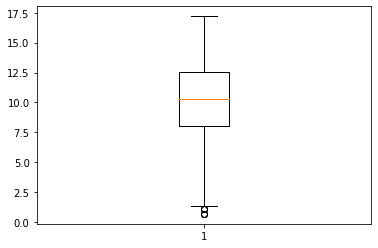

In [64]:
df_imputed['log_pop']=df_imputed['Total Affected'].apply(lambda x:np.log(x))
plt.boxplot(df_imputed['log_pop'].values)

In [0]:
df_imputed.drop('Total Affected',inplace=True,axis=1)

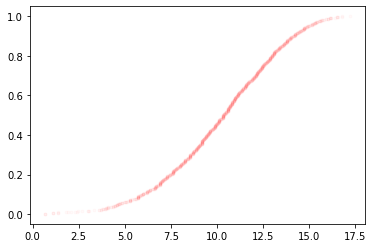

In [67]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDFs
x_1, y_1 = ecdf(df_imputed['log_pop'].values)
# Plot ECDFs of permutation sample
_ = plt.plot(x_1, y_1, marker='.', linestyle='none',color='red', alpha=0.02)

In [68]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
import xgboost as xgb

X=df_imputed.iloc[:,:-1]
y=df_imputed.iloc[:,-1]

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"), y)

[00:15:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ohe_onestep',
                 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=',
                                sort=True, sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [73]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=5, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=5, scoring="r2")

# Print the 10-fold RMSE
print("10-fold R^2: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

[00:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
10-fold RMSE:  2.519697994206164
[00:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear